In [7]:
import pandas as pd
data = pd.read_csv('FremontBridge12-18.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [8]:
data.columns = ['East', 'West']
data.fillna(0, inplace=True)
data['Total'] = data['West']+data['East']
data.head()

,East,West,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


In [14]:
pivoted = data.pivot_table(['East', 'West'],
                           index=data.index.date,
                           columns=data.index.hour)
pivoted.head()
X = pivoted.values
X.shape

from sklearn.decomposition import PCA

#Xpca = PCA(n_components=2).fit_transform(X)
Xpca = PCA(0.90, svd_solver='full').fit_transform(X)
Xpca.shape


(2189, 3)

In [28]:
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm.fit(Xpca)


cluster_label = gmm.predict(Xpca)
cluster_label

array([0, 0, 0, ..., 2, 1, 1], dtype=int64)

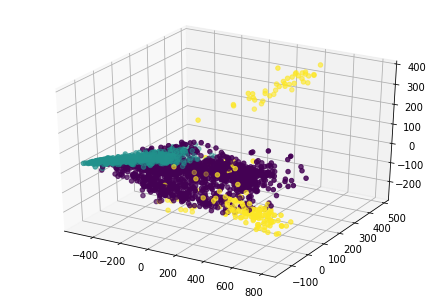

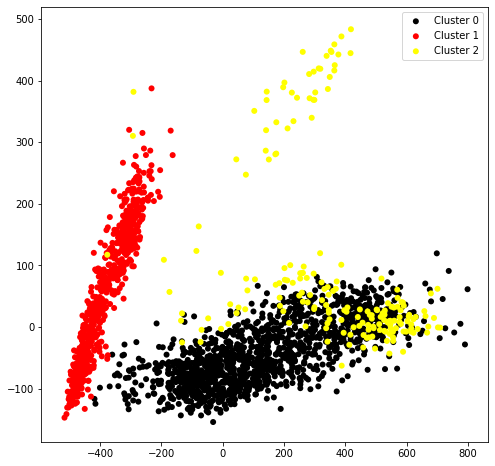

In [29]:
# plot in 3D 
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c=cluster_label)
pyplot.show()

# On to 2D plane

plt.figure(figsize=(8, 8))

for i, color in enumerate(['black', 'red', 'yellow']):
    inds = cluster_label == i
    x, y = Xpca[inds, 0], Xpca[inds, 1]
    plt.scatter(x, y, c=color, label="Cluster {}".format(i),
               edgecolors='none')

plt.legend()

In [ ]:
Three components were needed